This is a practice file, working with EEG data from the muse and manipulating it. 

In [2]:
#weird importing of libraries, very annoying, even with environment running into problems
import pandas
#pandas is a library that makes working with large data sets easier, especially csv type files (i think?)
import mne
#general library for handling EEG data

In [12]:
#PRACTICE IMPORTING DATA
#pandas is a library that makes working with large csv files faster and easier

#it is helpful to make a dictionary, to have convienient access to each data set

raw_recordings={
    "Jacob_Practice_1":pandas.read_csv("Data/Jacob_Practice_1.csv"), #NOTE THIS IS A 25 second recording I guess ???
    #"Jino_Practice_1":pandas.read_csv("Data/Jino_Practice_1.csv")
    
}

#good idea to print the head of each dataset to verify that it has worked

for key in raw_recordings:
    print(f"\n{key}") 
    print(raw_recordings[key].head())



Jacob_Practice_1
     timestamps     TP9     AF7     AF8   TP10  Right AUX
0  1.669165e+09  13.184  36.133  39.062  4.395     22.461
1  1.669165e+09  11.230  29.785  36.621 -1.953      4.395
2  1.669165e+09  18.555  32.227  42.480 -3.906      3.418
3  1.669165e+09  17.090  31.250  36.133 -3.906    -29.785
4  1.669165e+09  16.113  28.320  31.738 -0.488    -12.695


Creating RawArray with float64 data, n_channels=6, n_times=6428
    Range : 0 ... 6427 =      0.000 ...    25.105 secs
Ready.
Effective window size : 8.000 (s)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_1856\361022663.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data.plot_psd(picks=["AF7","AF8","TP9","TP10"],fmin=8,fmax=13)


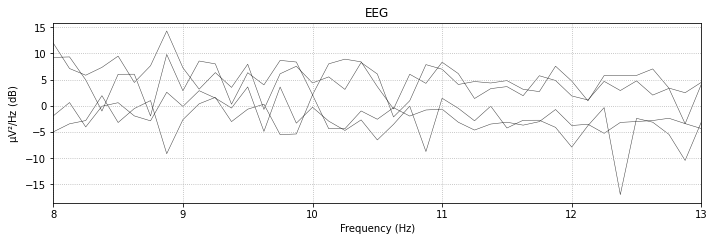

    Using multitaper spectrum estimation with 7 DPSS windows
(array([[2.23142223e-10, 2.34573709e-10, 3.29952967e-10, 3.43526861e-10,
        3.48373158e-10, 4.00727845e-10, 4.06189206e-10, 3.07441930e-10,
        3.05510581e-10, 2.54835414e-10, 3.41178640e-10, 3.55877693e-10,
        3.34797464e-10, 3.04863097e-10, 2.62861988e-10, 2.94068681e-10,
        2.78620851e-10, 2.39034761e-10, 2.10449258e-10, 3.00068738e-10,
        3.26645699e-10, 3.93100410e-10, 3.69996915e-10, 3.99839156e-10,
        4.16147089e-10, 5.24514987e-10, 5.61375468e-10, 4.74086216e-10,
        4.72124873e-10, 4.78939518e-10, 5.20761069e-10, 3.98933374e-10,
        3.10131274e-10, 3.04985967e-10, 3.64355867e-10, 4.46763018e-10,
        4.29666389e-10, 4.39892686e-10, 4.38685953e-10, 5.67005895e-10,
        7.05935206e-10, 7.48235259e-10, 7.67644048e-10, 7.17009781e-10,
        6.18329003e-10, 6.22467985e-10, 5.17435736e-10, 3.86312819e-10,
        3.47066232e-10, 2.48585093e-10, 1.80089548e-10, 1.66420523e-10,
  

In [13]:
#handling power spectral display

#we are giving MNE the names of our channels, the sampling rate, and the types of channels, this really shouldnt ever change
#mne.create_info(ch_names, sfreq, ch_types='misc', verbose=None)
info = mne.create_info(["timestamps","TP9","AF7","AF8", "TP10", "Right AUX"], 256, ch_types="eeg")

#creates a dictionary, keys are dataset names, values are mne raw.array obejcts, note that the "info" variable is fed into the definition of the raw.data object
raw_data = {dataset_name : mne.io.RawArray(raw_recordings[dataset_name].values.T/1000000, info) for dataset_name in raw_recordings.keys()}

#prints psd data for each raw.data object in the above defined dictionary
#fmin and max can be used to specify the minimum and maximum frequencies that are plotted, the alpha band is 8-13 Hz
for key, data in raw_data.items():
        data.plot_psd(picks=["AF7","AF8","TP9","TP10"],fmin=8,fmax=13)

#mne.time_frequency.psd_welch , this command generates the power spectral density for some data set
#mne.time_frequency.psd_multitaper, this is another function to genererate the psd, using a different mathematical method, the difference
#between the Welch method I am unsure of 

#fmin and fmax specify the min and max frequencies that will be analyzed, the alpha band (which we are interested in is 8-13 Hz)
#picks is a list of the channels we would like to include in our analysis

#the plot psd function appears to not use the Welch method, as it returns relativly few data points compared to what is graphed, ignore this maybe idk

for key, data in raw_data.items():
    psd_raw=mne.time_frequency.psd_multitaper(data,fmin=8,fmax=13,picks=["AF7","AF8","TP9","TP10"])
    print(psd_raw)


#the output of the function is two arrays, 4xn array where the 4 channels are represented by 4 vectors of n valuables representing the power at
#the n frequencies

#from here how can we take the domininant frequency? 

In [26]:
#Working on windowing data #Update, this doesn't seem to be the best route, ie. using make_fixed_length_epochs , 
# will keep here for archive though
from muselsl_utils import epoch
epoched_data={}

#this creates a new dictionary contained epoched versions of the raw data that was previously handled
#epoched data is its own class in the MNE library

for key, data in raw_data.items():
    epoched_data[key]=mne.make_fixed_length_epochs(data,1,preload=True)
    window=(epoched_data[key].get_data([1]))
    #print(window[1])


#

Not setting metadata
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Loading data for 25 events and 256 original time points ...
0 bad epochs dropped


In [38]:
#another attempt at windowing pre-recorded data 
raw=raw_data["Jacob_Practice_1"]
#this function gets the indices of the specified time range, in this case set to the first second of the recording
times=raw.time_as_index([0,1])

#raw_window=raw[[0,256]]

<class 'mne.io.array.array.RawArray'>


Creating RawArray with float64 data, n_channels=6, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_6876\943933641.py:9: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_window.plot_psd(picks=["AF7","AF8","TP9","TP10"],fmin=8,fmax=13)


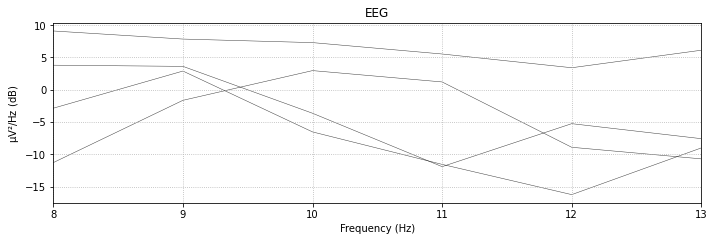

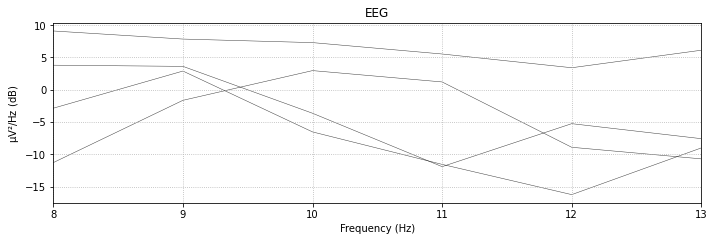

In [16]:
#another.... attempt at windowing pre-recorded data
#this seems to be working?
#okay, now we can get a segment of our array, a littla annoying and probably slow, but whatever
raw=raw_data["Jacob_Practice_1"]
raw_window=raw.get_data(picks=None, start=0,stop=256)
raw_window = mne.io.RawArray(raw_window, info)
psd_raw=mne.time_frequency.psd_welch(raw_window,fmin=8,fmax=13,picks=["AF7","AF8","TP9","TP10"])

raw_window.plot_psd(picks=["AF7","AF8","TP9","TP10"],fmin=8,fmax=13)




In [16]:
#going to write a self contained function for windowing and processing pre-recorded data

def dominant_freq(window):
    #performs a power spectral display function on both the alpha and theta range
    psd_raw_alpha=mne.time_frequency.psd_multitaper(window,fmin=8,fmax=13,picks=["AF7","AF8","TP9","TP10"])
    psd_raw_theta=mne.time_frequency.psd_multitaper(window,fmin=4,fmax=8,picks=["AF7","AF8","TP9","TP10"])
    print(psd_raw_alpha)
    #for loop to take the dominant frequency for alpha range


    return [dominant_alpha, dominant_theta]


#user will be the patient that we are working with
def baseline(user):

    #defines some parameters to be used by the MNE library, specific to our recording setup
    info = mne.create_info(["timestamps","TP9","AF7","AF8", "TP10", "Right AUX"], 256, ch_types="eeg")

    #imports the raw recording data from the Data folder, 
    raw_recording = pandas.read_csv(str("Data/"+user+"_Baseline.csv"))
    print("Data imported...")
    #takes the raw recording and moves it into an MNE raw array object, allows for easier manipulation later
    #this is a different transformation than later as we are working with a Pandas object
    raw_array = mne.io.RawArray(raw_recording.values.T/1000000, info)
    print("Raw moved to raw_array")
    #note that we are working with a setup recording at 256 Hz, thus a 256 time step sample represents one second
    step=0 #sets the start point of our window
    max=len(raw_array) #sets the max sample point of our recording
    distribution=[]
    while step<max:
        #takes a one second sample from the raw recording, this is a numpy array though...
        raw_window=raw_array.get_data(picks=None, start=step,stop=(step+256))
        #again moves this array into ane MNE raw array object            
        mne_window = mne.io.RawArray(raw_window, info)
        #advances the sample window forward by a second
        step=step+256
        dominant_freq(mne_window)

baseline("Jacob")

Data imported...
Creating RawArray with float64 data, n_channels=6, n_times=6428
    Range : 0 ... 6427 =      0.000 ...    25.105 secs
Ready.
Raw moved to raw_array
Creating RawArray with float64 data, n_channels=6, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
(array([[2.81507894e-10, 1.61092460e-10, 1.43371323e-10, 1.47882375e-10,
        1.41858260e-10, 8.64495142e-11],
       [5.77194876e-10, 2.84879255e-10, 1.27726274e-10, 1.45699442e-10,
        1.35910064e-10, 1.41769242e-10],
       [1.10398053e-09, 4.91269206e-10, 3.24549620e-10, 1.99243516e-10,
        1.26375991e-10, 1.57683651e-10],
       [7.04160356e-10, 6.27871970e-10, 6.46362718e-10, 6.33388925e-10,
        4.78882641e-10, 3.94842397e-10]]), array([ 8.,  9., 10., 11., 12., 13.]))


NameError: name 'dominant_alpha' is not defined

In [7]:
#this is all the code that Alex used to initialize the Muse stream and take live data

import numpy as np  # Module that simplifies computations on matrices
import matplotlib.pyplot as plt  # Module used for plotting
from pylsl import StreamInlet, resolve_byprop  # Module to receive EEG data
import muselsl_utils as muselsl_utils  # Our own utility functions
import utils
import serial

# Initialize the bluetooth stream to the Arduino
#this connects to the arduino, breaks 
#serial_port = serial.Serial("COM4", baudrate=9600, timeout=10)
#serial_port.flushInput()
# Handy little enum to make code more readable
class Band:
    Delta = 0
    Theta = 1
    Alpha = 2
    Beta = 3


blink_types = ["Right Wink", "Left Wink", "Normal Blink", "Nothing"]

""" EXPERIMENTAL PARAMETERS """
# Modify these to change aspects of the signal processing

# Length of the EEG data buffer (in seconds)
# This buffer will hold last n seconds of data and be used for calculations
BUFFER_LENGTH = 5

# This is the batch size that out code will grab from the buffer when it is ready to process the new data
EPOCH_LENGTH = 1

# Amount of overlap between two consecutive epochs (in seconds)
OVERLAP_LENGTH = 0.9

# Amount to 'shift' the start of each next consecutive epoch
SHIFT_LENGTH = EPOCH_LENGTH - OVERLAP_LENGTH

# Index of the channel(s) (electrodes) to be used
# 0 = left ear, 1 = left forehead, 2 = right forehead, 3 = right ear
INDEX_CHANNEL = [0, 1, 2, 3]

if __name__ == "__main__":

    """ 1. CONNECT TO EEG STREAM """

    # Search for active LSL streams
    print('Looking for an EEG stream...')
    streams = resolve_byprop('type', 'EEG', timeout=2)
    if len(streams) == 0:
        raise RuntimeError('Can\'t find EEG stream.')

    # Set active EEG stream to inlet and apply time correction
    print("Start acquiring data")
    inlet = StreamInlet(streams[0], max_chunklen=12)
    eeg_time_correction = inlet.time_correction()

    # Get the stream info and description
    info = inlet.info()
    description = info.desc()

    # Get the sampling frequency
    # This is an important value that represents how many EEG data points are
    # collected in a second. This influences our frequency band calculation.
    # for the Muse 2016, this should always be 256
    fs = int(info.nominal_srate())

    """ 2. INITIALIZE BUFFERS """

    # Initialize raw EEG data buffer - 256*5 x 4 array to store the last 5 seconds
    eeg_buffer = np.zeros((int(fs * BUFFER_LENGTH), 4))
    filter_state = None  # for use with the notch filter

    # Compute the number of epochs in "buffer_length"
    n_win_test = int(np.floor((BUFFER_LENGTH - EPOCH_LENGTH) /
                              SHIFT_LENGTH + 1))

    # Initialize the band power buffer (for plotting)
    # bands will be ordered: [delta, theta, alpha, beta]
    band_buffer = np.zeros((n_win_test, 4))

    """ 3. GET DATA """

    # The try/except structure allows to quit the while loop by aborting the
    # script with <Ctrl-C>
    print('Press Ctrl-C in the console to break the while loop.')

    try:
        # The following loop acquires data, computes band powers, and calculates neurofeedback metrics based on those band powers
        while True:

            """ 3.1 ACQUIRE DATA """
            # Obtain EEG data from the LSL stream
            eeg_data, timestamp = inlet.pull_chunk(
                timeout=1, max_samples=int(SHIFT_LENGTH * fs))

            # Only keep the channel we're interested in
            ch_data = np.array(eeg_data)[:, 0:4]

            # Update EEG buffer with the new data
            #this eeg_buffer is a 5 second store of data, sampled at 256 Hz, it is a numpy array
            eeg_buffer, filter_state = muselsl_utils.update_buffer(
                eeg_buffer, ch_data, notch=False,
                filter_state=filter_state)
            print((eeg_buffer[-1]))

            """ 3.2 COMPUTE BAND POWERS """
            # Get newest samples from the buffer
            data_epoch = muselsl_utils.get_last_data(eeg_buffer,
                                             EPOCH_LENGTH * fs)

            #commenting this out for now, not sure what it does, but pretty sure we dont need it
            #print('Alpha Relaxation: ', alpha_metric)
            #x = utils.compute_features(data_epoch, filter=None, pca=None, use_original=True)
            #probabilities = classifier.predict_proba([x])
           # if np.any(probabilities > 0.8): 
               # print(f"\r{blink_types[np.argmax(probabilities)]} : {probabilities.max()}")
               # serial_port.write(bytes(str(np.argmax(probabilities)), encoding='utf-8'))

            # Beta Protocol:
            # Beta waves have been used as a measure of mental activity and concentration
            # This beta over theta ratio is commonly used as neurofeedback for ADHD
            # beta_metric = smooth_band_powers[Band.Beta] / \
            #     smooth_band_powers[Band.Theta]
            # print('Beta Concentration: ', beta_metric)

            # Alpha/Theta Protocol:
            # This is another popular neurofeedback metric for stress reduction
            # Higher theta over alpha is supposedly associated with reduced anxiety
            # theta_metric = smooth_band_powers[Band.Theta] / \
            #     smooth_band_powers[Band.Alpha]
            # print('Theta Relaxation: ', theta_metric)

    except KeyboardInterrupt:
        #serial_port.close()
        print('Closing!')

Looking for an EEG stream...
Start acquiring data
Press Ctrl-C in the console to break the while loop.
[-366.2109375 -716.796875  -906.25      -871.09375  ]
[  381.34765625  -726.07421875  -915.0390625  -1000.        ]
[-141.11328125 -812.5        -854.00390625 -489.74609375]
[-905.76171875 -868.65234375 -718.75        319.3359375 ]
[-1000.          -895.99609375  -637.20703125  -796.875     ]
[-1000.          -830.078125    -655.76171875  -967.28515625]
[-977.05078125 -768.06640625 -770.99609375  -71.77734375]
[ 188.96484375 -719.7265625  -915.0390625  -849.609375  ]
[  702.1484375   -766.11328125  -989.74609375 -1000.        ]
[ 179.19921875 -818.359375   -860.3515625  -454.58984375]
[-660.64453125 -837.890625   -620.1171875   388.671875  ]
[-1000.          -887.20703125  -576.66015625  -764.6484375 ]
[-1000.          -899.4140625   -728.02734375  -860.83984375]
[-257.32421875 -825.68359375 -919.921875   -206.54296875]
[  305.17578125  -772.4609375   -962.890625   -1000.        ]
[  